In [36]:
#libraries
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib as plt
import scipy 
import seaborn as sns

In [25]:
#import Min Max Temperature (already formatted in Excel)

MinMax = pd.read_csv('Min Max Temp.csv')
MinMax

,Product code,Bureau of Meteorology station number,Year,Month,Day,Day of the Year,Minimum temperature (Degree C),Maximum temperature (Degree C)
0,IDCJAC0010,86338,2015,1,1,1,13.3,26.9
1,IDCJAC0010,86338,2015,1,2,2,15.4,38.8
2,IDCJAC0010,86338,2015,1,3,3,20.0,38.2
3,IDCJAC0010,86338,2015,1,4,4,16.3,21.4
4,IDCJAC0010,86338,2015,1,5,5,15.0,22.0
...,...,...,...,...,...,...,...,...
2284,IDCJAC0010,86338,2021,4,3,93,15.1,31.6
2285,IDCJAC0010,86338,2021,4,4,94,15.2,24.5
2286,IDCJAC0010,86338,2021,4,5,95,16.0,19.0
2287,IDCJAC0010,86338,2021,4,6,96,12.8,20.2


In [26]:
MinMax.shape

(2289, 8)

In [27]:
MinMax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product code                          2289 non-null   object 
 1   Bureau of Meteorology station number  2289 non-null   int64  
 2   Year                                  2289 non-null   int64  
 3   Month                                 2289 non-null   int64  
 4   Day                                   2289 non-null   int64  
 5   Day of the Year                       2289 non-null   int64  
 6   Minimum temperature (Degree C)        2289 non-null   float64
 7   Maximum temperature (Degree C)        2289 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 143.2+ KB


In [28]:
#Check for missing values

MinMax.isnull().sum()

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Day                                     0
Day of the Year                         0
Minimum temperature (Degree C)          0
Maximum temperature (Degree C)          0
dtype: int64

In [29]:
#Delete columns that are irrelevant for prediction

MinMax = MinMax.drop(columns = ["Product code", "Bureau of Meteorology station number"])
MinMax.shape

(2289, 6)

In [30]:
#Rename min and max columns for easier coding

MinMax = MinMax.rename(columns = {'Minimum temperature (Degree C)': 'Min'})
MinMax = MinMax.rename(columns = {'Maximum temperature (Degree C)': 'Max'})
MinMax


,Year,Month,Day,Day of the Year,Min,Max
0,2015,1,1,1,13.3,26.9
1,2015,1,2,2,15.4,38.8
2,2015,1,3,3,20.0,38.2
3,2015,1,4,4,16.3,21.4
4,2015,1,5,5,15.0,22.0
...,...,...,...,...,...,...
2284,2021,4,3,93,15.1,31.6
2285,2021,4,4,94,15.2,24.5
2286,2021,4,5,95,16.0,19.0
2287,2021,4,6,96,12.8,20.2


In [31]:
#Test for predictive values of columns
from scipy import stats
a = MinMax['Day']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value is: -0.009218111769541591
r value is: -0.010700769733552119


In [32]:
#Test for predictive values of columns
a = MinMax['Day of the Year']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value is: -0.28855363275401014
r value is: -0.19512225024695978


In [33]:
#Test for predictive values of columns
a = MinMax['Year']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value is: 0.031119063230355272
r value is: 0.034747609209749716


In [35]:
a = MinMax['Month']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.2910706019009437
r value (Max) is: -0.19692108832941452


#### Day of the Month < r = |0.01| and Year < r = |0.04| consider removing for better prediction. 

In [49]:
MinMax['Day'] = MinMax['Day'].astype(str)
MinMax.dtypes

Year                 int64
Month                int64
Day                 object
Day of the Year      int64
Min                float64
Max                float64
dtype: object

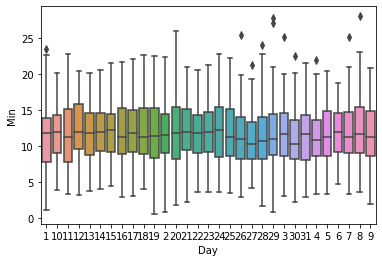

In [54]:
#Box plots of Day of Month for Minimum temperature
from matplotlib import figure

#plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day', y= 'Min',data = MinMax)


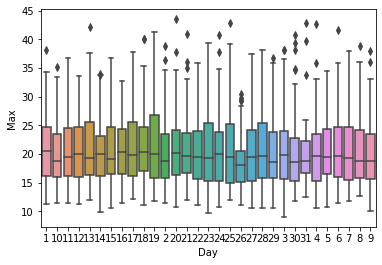

In [55]:
#Box plots of Day of Month for Maximum temperature


sns.boxplot(x= 'Day', y= 'Max',data = MinMax)

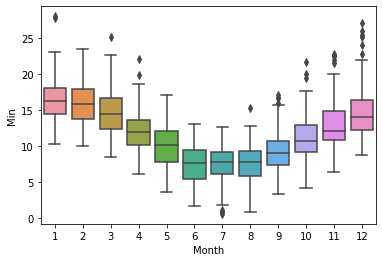

In [59]:
#Box plots of Month for Minumum temperature


sns.boxplot(x= 'Month', y= 'Min',data = MinMax)


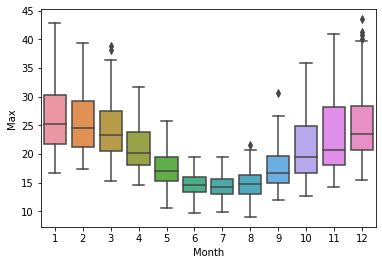

In [60]:
#Box plots of Month for Minumum temperature

sns.boxplot(x= 'Month', y= 'Max',data = MinMax)

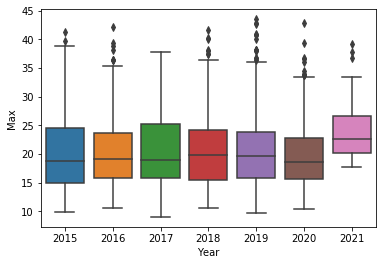

In [61]:
#Box plots of Year for Max temperature

sns.boxplot(x= 'Year', y= 'Max',data = MinMax)

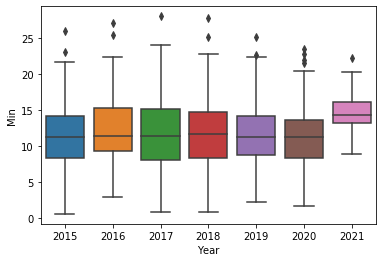

In [62]:
#Box plots of Year for Minumum temperature


sns.boxplot(x = 'Year', y = 'Min', data = MinMax)